# Бриллианты

Я выбрал этот дасет на платформе kaggle. Этот набор данных содержит цены и другие атрибуты почти 54 000 алмазов.
Вот сама ссылка на датасет: https://www.kaggle.com/datasets/shivam2503/diamonds
Характер этих данных немного не понятен, но в обсуждениях кто-то написал, что это снимки прайс-листа Tiffany & Co от 2017 года(будем им верить).




In [209]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [61]:
df = pd.read_csv('/Users/vadimipatov/Desktop/машинка фарид/diamonds.csv')

Ниже приведены все атрибуты датасета и их типы:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Описание каждого атрибута**

Unnamed: 0 - нумерация 

price - цена в долларах США (\$326--\$18 823)

carat - вес бриллианта вкаратах (0,2--5,01)

cut - качествоогранки (Fair, Good, Very Good, Premium, Ideal)

color - цвет бриллианта, от J (худший) до D (лучший)

clarity - показатель прозрачности бриллианта (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший))

x - длина в мм (0--10,74)

y - ширина в мм (0--58,9)

z - глубина в мм (0--31,8)

depth - общая глубина в процентах = z / среднее(x, y) = 2 * z / (x + y) (43--79)

table - ширина вершины алмаза относительно самой широкой точки (43--95)

**Задача анализа**
Это датасет для обучающихся и в нем нет какой-то определенной задачи,
но можно научиться хорошо определять цену бриллиантов, если это когда-то пригодится 

Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [26]:
df.describe(include = "all")

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


**Гистограммы распределения значений**

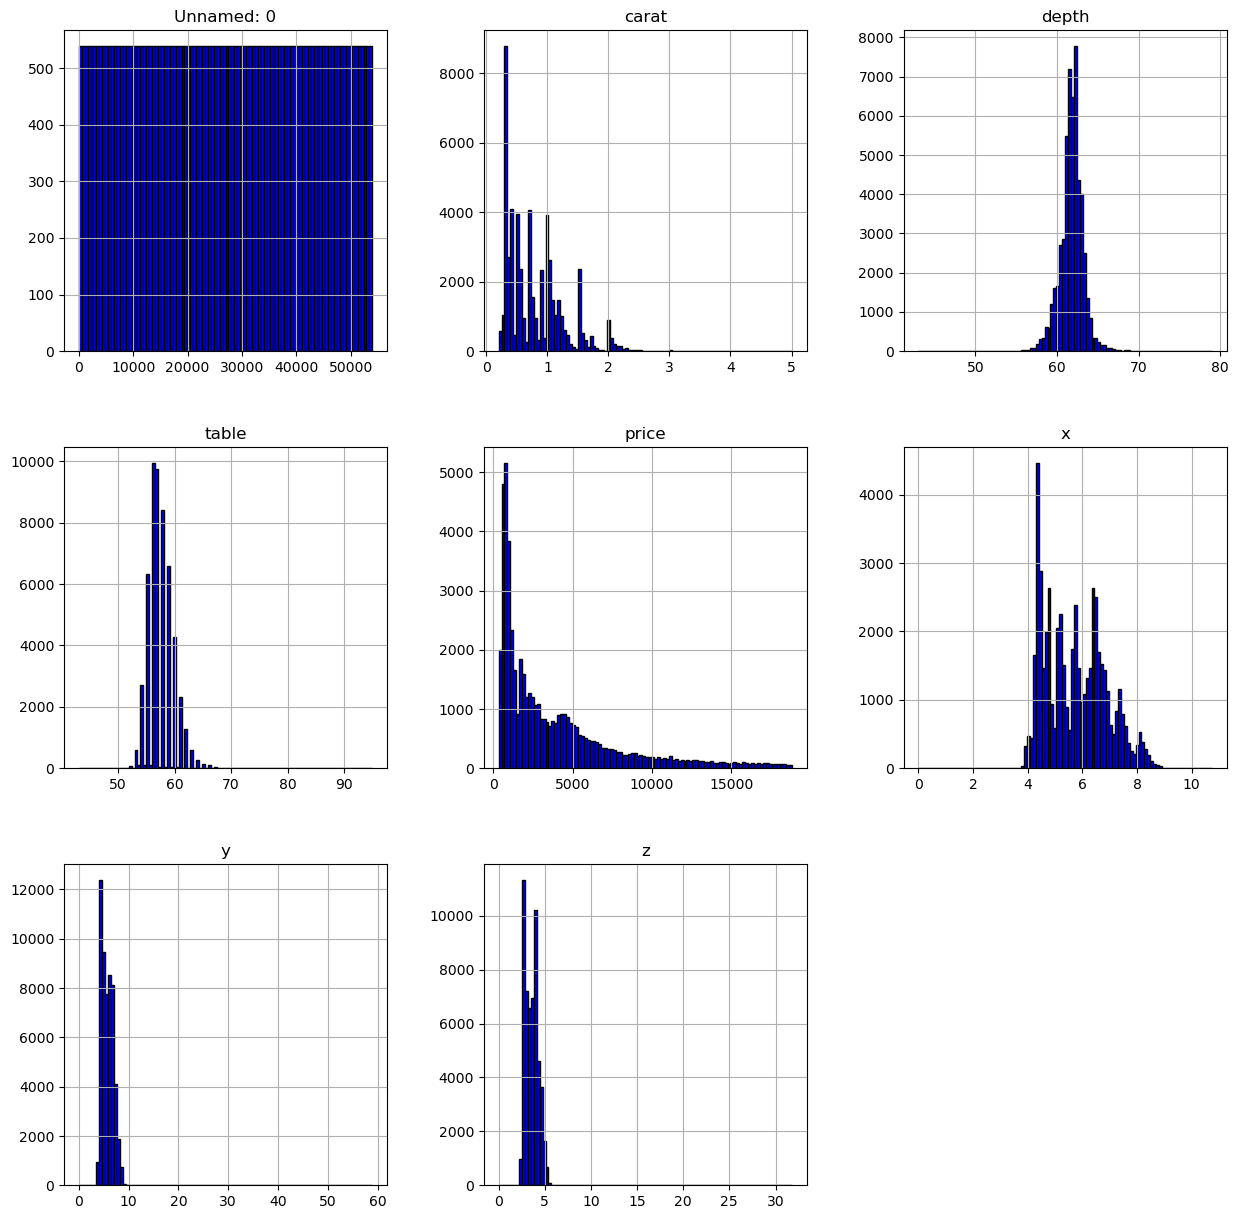

In [337]:
df.hist(figsize=(15,15), color = 'blue', edgecolor = 'black', bins = int(100))
plt.pyplot.show()

**Выбросы для каждого атрибута, методом z-score**


In [237]:
z_scores = stats.zscore(df['carat'])
outliers = df[(z_scores < -3) | (z_scores > 3)]
outliers

   

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
13757,13758,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
14138,14139,2.27,Fair,J,I1,67.6,55.0,5733,8.05,8.00,5.43
15684,15685,2.49,Fair,J,I1,66.3,58.0,6289,8.26,8.18,5.45
16283,16284,3.00,Very Good,H,I1,63.1,55.0,6512,9.23,9.10,5.77
16439,16440,2.22,Fair,H,I1,70.1,55.0,6564,7.77,7.74,5.44
...,...,...,...,...,...,...,...,...,...,...,...
27727,27728,2.61,Ideal,I,SI2,62.1,56.0,18756,8.85,8.73,5.46
27731,27732,2.55,Premium,I,VS1,61.8,62.0,18766,8.70,8.65,5.36
27739,27740,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.00
27744,27745,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24


In [ ]:
z_scores = stats.zscore(df['depth'])
outliers = df[(z_scores < -3) | (z_scores > 3)]
outliers


In [ ]:
z_scores = stats.zscore(df['table'])
outliers = df[(z_scores < -3) | (z_scores > 3)]
outliers

In [ ]:
z_scores = stats.zscore(df['price'])
outliers = df[(z_scores < -3) | (z_scores > 3)]
outliers

In [ ]:
z_scores = stats.zscore(df['x'])
outliers = df[(z_scores < -3) | (z_scores > 3)]
outliers

In [ ]:
z_scores = stats.zscore(df['y'])
outliers = df[(z_scores < -3) | (z_scores > 3)]
outliers

In [ ]:
z_scores = stats.zscore(df['z'])
outliers = df[(z_scores < -3) | (z_scores > 3)]
outliers

**Пропущенные значения**

Как оказалось, их нет 

In [342]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Рассчитываем корреляцию между атрибутами**

In [278]:
number_columns = df.select_dtypes(include=['float64', 'int64'])
cor_matrix = number_columns.corr()
cor_matrix

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Характер корреляций**

0.0-0.2 : Отсутствие корреляции

0.2-0.5 : Слабая корреляция

0.5-0.85 : Средняя корреляция

0.85-1.0 : Высокая корреляция

In [381]:
high_cor = cor_matrix[(cor_matrix.abs() >= 0.85) & (cor_matrix != 1)]
print("Высокая корреляция:")
high_cor


Высокая корреляция:


,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carat,NaN,NaN,NaN,NaN,0.921591,0.975094,0.951722,0.953387
depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,0.921591,NaN,NaN,NaN,0.884435,0.865421,0.861249
x,NaN,0.975094,NaN,NaN,0.884435,NaN,0.974701,0.970772
y,NaN,0.951722,NaN,NaN,0.865421,0.974701,NaN,0.952006
z,NaN,0.953387,NaN,NaN,0.861249,0.970772,0.952006,NaN


In [368]:
low_cor = cor_matrix[cor_matrix.abs() < 0.2]
print("Отсутствие корреляции:")
low_cor

Отсутствие корреляции:


,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,NaN,NaN,-0.034800,-0.100830,NaN,NaN,NaN,NaN
carat,NaN,NaN,0.028224,0.181618,NaN,NaN,NaN,NaN
depth,-0.03480,0.028224,NaN,NaN,-0.010647,-0.025289,-0.029341,0.094924
table,-0.10083,0.181618,NaN,NaN,0.127134,0.195344,0.183760,0.150929
price,NaN,NaN,-0.010647,0.127134,NaN,NaN,NaN,NaN
x,NaN,NaN,-0.025289,0.195344,NaN,NaN,NaN,NaN
y,NaN,NaN,-0.029341,0.183760,NaN,NaN,NaN,NaN
z,NaN,NaN,0.094924,0.150929,NaN,NaN,NaN,NaN


In [379]:
mean_cor = cor_matrix[(cor_matrix.abs() >= 0.5) & (cor_matrix.abs() < 0.85)]
print("Средняя корреляция:")
mean_cor

Средняя корреляция:


,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [370]:
weak_cor = cor_matrix[(cor_matrix.abs() >= 0.2) & (cor_matrix.abs() < 0.5)]
print("Слабая корреляция:")
weak_cor

Слабая корреляция:


,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,NaN,-0.377983,NaN,NaN,-0.306873,-0.40544,-0.395843,-0.399208
carat,-0.377983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,NaN,NaN,NaN,-0.295779,NaN,NaN,NaN,NaN
table,NaN,NaN,-0.295779,NaN,NaN,NaN,NaN,NaN
price,-0.306873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,-0.405440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,-0.395843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z,-0.399208,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Матрица графиков рассеивания**

<function matplotlib.pyplot.show(close=None, block=None)>

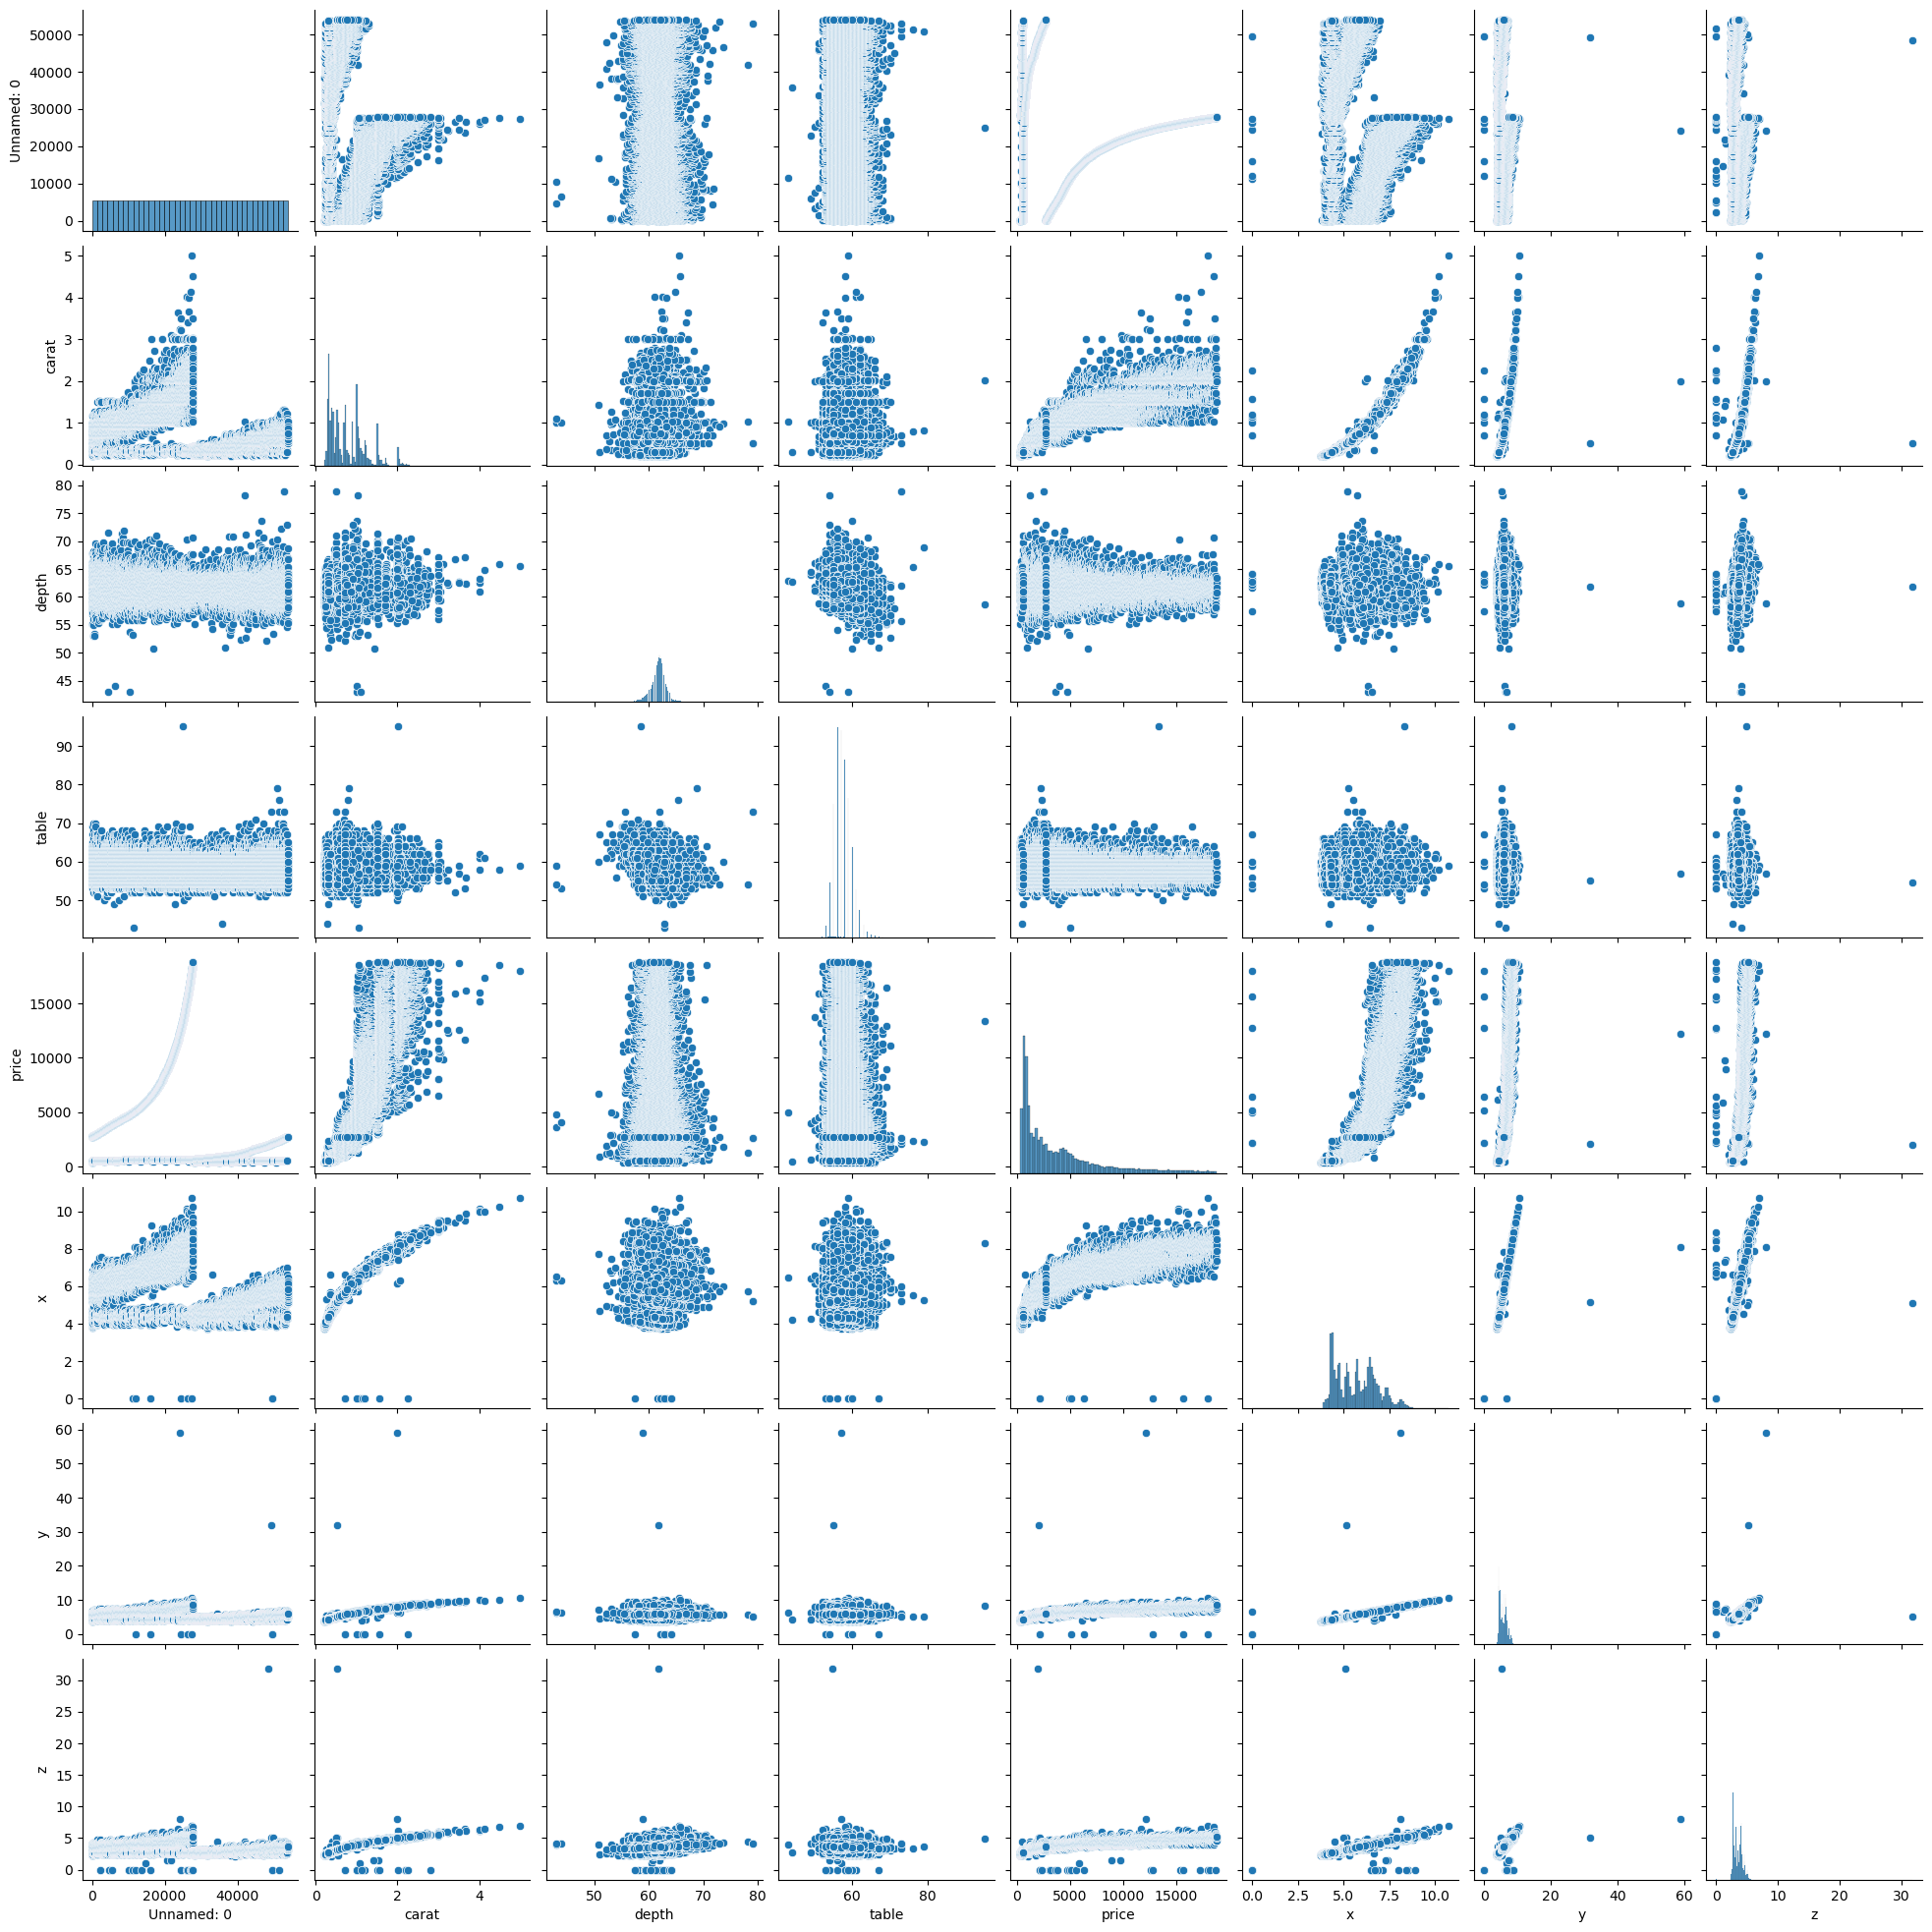

In [377]:
number_columns = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(number_columns)
plt.pyplot.show

**Вывод:**

В нашем датасете корреляция отсутствует у атрибутов: table и depth. 

Также есть такие атрибуты, как carat, price, x, y, z, корреляция которых высока между собой.

Это подтверждает и матрица графиков рассеивания